<a href="https://colab.research.google.com/github/Hiranyabandi/MRM-6010/blob/main/hbandi_model_diagnostics_and_prediction_uncertainty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install piml

# Data Pipeline

In [2]:
from piml import Experiment
exp_tw_credit = Experiment()
exp_bike_sharing = Experiment()
exp_tw_credit.data_loader("TaiwanCredit", silent=True)
exp_bike_sharing.data_loader("BikeSharing", silent=True)

### Q1 (5pts): Using PiML, show data summary tables for both data sets.  What is the max value of `cnt` in the bike share data?  How many unique values are there in the `EDUCATION` data point of the Taiwan credit data?

In [3]:

# Show data summary for both datasets
print("Summary for Taiwan Credit Data:")
exp_tw_credit.data_summary()

print("\nSummary for Bike Sharing Data:")
exp_bike_sharing.data_summary()




HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Summary for Taiwan Credit Data:


HTML(value='<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.…


Summary for Bike Sharing Data:


HTML(value='<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.…

*   From the summary of bike sharing data - max value of cnt is 977.0
*   Unique values in the EDUCATION data point of the Taiwan credit data - 4

# Model Pipeline

In [4]:
from xgboost import XGBClassifier, XGBRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor

exp_bike_sharing.data_prepare(random_state=100, target="cnt", test_ratio=0.2, task_type="regression", split_method="random", silent=True)
exp_tw_credit.data_prepare(random_state=100, target="FlagDefault", test_ratio=0.2, task_type="classification", split_method="random", silent=True)

exp_bike_sharing.model_train(model=XGBRegressor(max_depth=5, n_estimators=500), name="XGB_Bike_Sharing")
exp_bike_sharing.model_train(model=MLPRegressor(hidden_layer_sizes=[10]*2, activation="relu", random_state=0, early_stopping=True), name="DNN_Bike_Sharing")

exp_tw_credit.model_train(model=XGBClassifier(max_depth=5, n_estimators=500), name="XGB_TW_Credit")
exp_tw_credit.model_train(model=MLPClassifier(hidden_layer_sizes=[10]*2, activation="relu", random_state=0, early_stopping=True), name="DNN_TW_Credit")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

### Q2 (5pts): What does the `random_state` parameter do?  Will the XGB model for the bike sharing data turn out identical every time you run the code above?


*  What the random_state parameter does:

1. The random_state parameter is used to control the randomness in various aspects of your machine learning process, particularly when we use algorithms like XGBoost, neural networks (MLP), or data splitting techniques like train_test_split.

2.  By setting a specific value to random_state, it ensure that the same random numbers are used each time when we run the code. This makes the results reproducible and allows to compare and run more consistently.

* Will the XGB model be identical every time?

No, it's not guaranteed. While the data split and the overall process will be consistent due to the random_state=100 in the data_prepare step, the XGBoost model itself may still produce slightly different results across runs. Because:

1. if you set random_state in data_prepare, XGBoost can still introduce some randomness during its tree construction.

2. Even with the same data split, XGBoost is still learning from the data. The order of boosting rounds and the specific tree structures can vary slightly, depending on the data itself.


### Q3 (2.5pts): What are the hyperparameters specified in each type of model?


The hyperparameters used for each model:
1. XGBoost Models
*  max_depth=5
*  n_estimators=500

2. Deep Neural Network (DNN) Models
*  hidden_layer_sizes=[10]*2
*  activation="relu"
*  random_state=0
*  early_stopping=True


## Bike sharing dataset with XGB model and DNN model

### Q4 (10 pts): Compute the reliability table (including empirical coverage and average bandwidth) of the two Bike Sharing models; which model is more reliable?

In [5]:

# Reliability Table for XGB_Bike_Sharing
exp_bike_sharing.model_diagnose(model="XGB_Bike_Sharing", show="reliability_table")

# Reliability Table for DNN_Bike_Sharing
exp_bike_sharing.model_diagnose(model="DNN_Bike_Sharing", show="reliability_table")



HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,Empirical Coverage,Average Bandwidth
0,0.8813,0.1042


,Empirical Coverage,Average Bandwidth
0,0.8856,0.1874


From the above table " XGBoost has narrow bandwidth that makes it more reliable than DNN."


### Q5 (5 pts): Use the `reliability_distance` function in PiML on the XGB model of the bike sharing data.  List the top 5 features that have the largest distributional distance between unreliable regions and reliable regions based on PSI score. (You can use the defaults for all other arguments of `model_diagnose`)


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

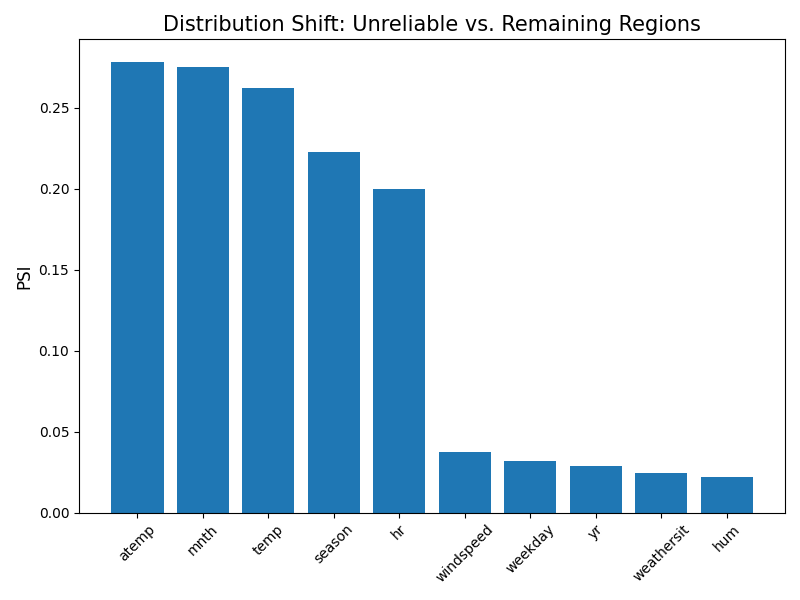

In [6]:
# reliability_distance function in PiML on the XGB model of the bike sharing data

# Reliability distance for XGB_Bike_Sharing
exp_bike_sharing.model_diagnose(model="XGB_Bike_Sharing", show="reliability_distance")

# List the top 5 features - atemp,mnth,temp,season,hr.

List the top 5 features - atemp,mnth,temp,season,hr

### Q6 (5 pts): Do the same analysis as in Q5, but use a threshold of 1.3.  Why did the PSI values increase?


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

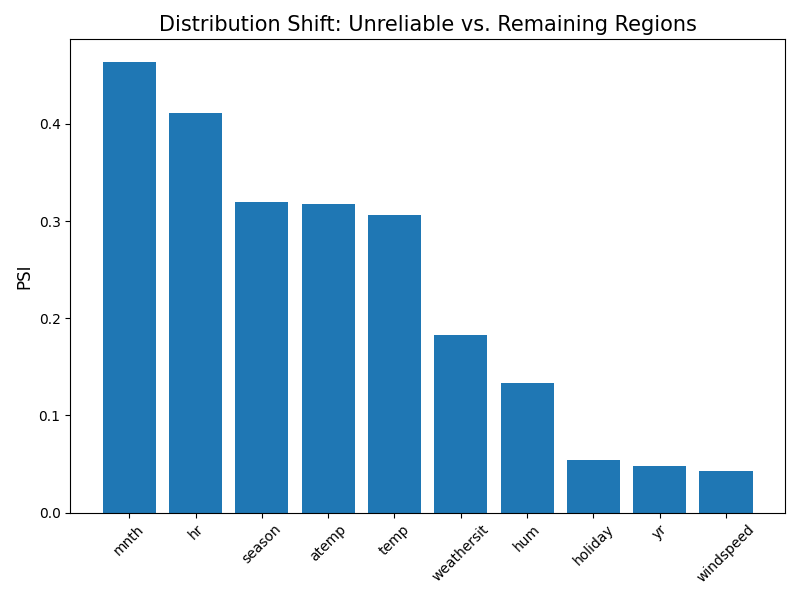

In [7]:
# Reliability distance for XGB_Bike_Sharing with threshold 1.3
exp_bike_sharing.model_diagnose(model="XGB_Bike_Sharing", show="reliability_distance", threshold=1.3)


When you raise the bar for reliability, you have fewer "reliable" data points, and the gap between the "reliable" and "unreliable" data becomes wider, making the PSI value increases.


### Q7 (2.5 pts): Do the same analysis as in Q6, but use the Wasserstein distance measure instead of PSI.  Are the results the same?


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

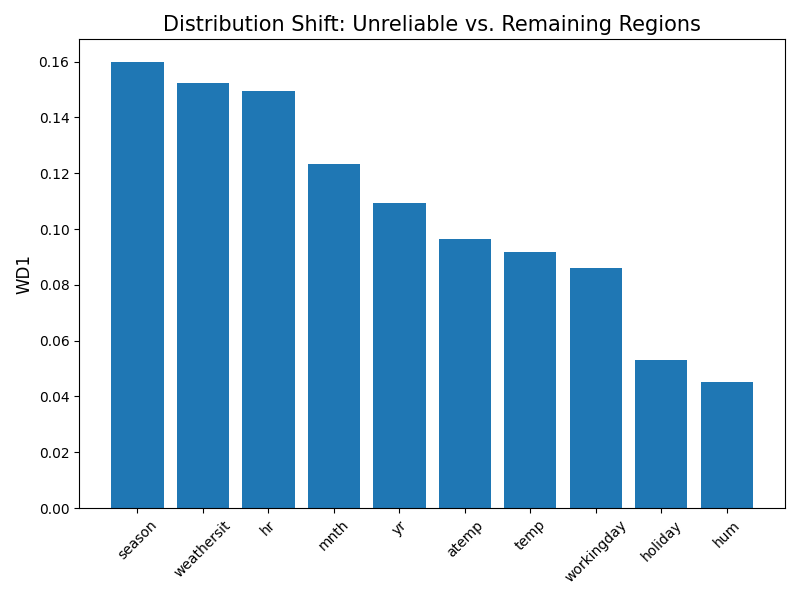

In [8]:
# Reliability distance for XGB_Bike_Sharing with Wasserstein distance
exp_bike_sharing.model_diagnose(model="XGB_Bike_Sharing", show="reliability_distance", distance_metric="WD1", threshold=1.3)

No, the results are not the same.
PSI and Wasserstein distance are fundamentally different metrics.
PSI focuses on the differences in the distribution of features between reliable and unreliable regions using binning and KL Divergence.
Wasserstein distance, also known as Earth Mover's Distance, quantifies the minimum amount of "work" needed to transform one distribution into another.
Therefore, they may identify different features as having the largest distributional distances and potentially highlight different aspects of model reliability.

### Q8 (5 pts): Do the same analysis as in Q5, but for the DNN model.  Are the results the same as Q5?  Why or why not?


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

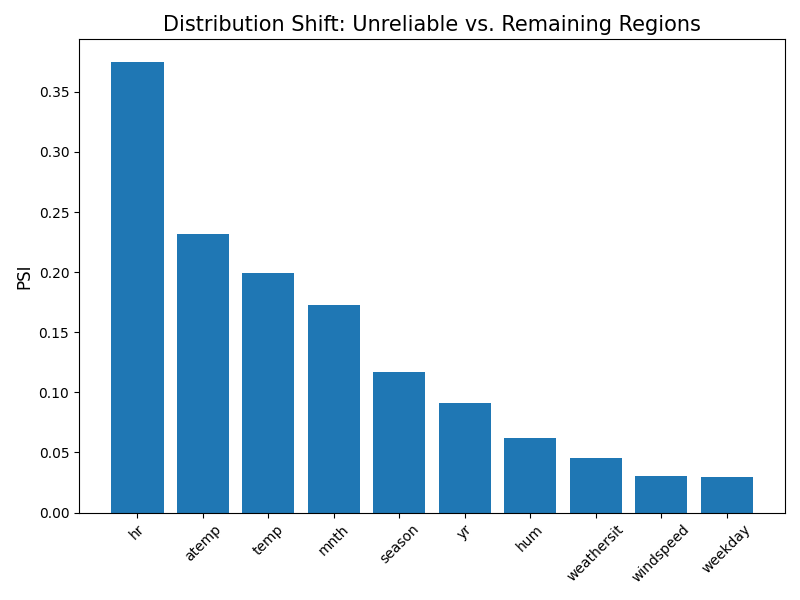

In [9]:
# Reliability distance for DNN_Bike_Sharing
exp_bike_sharing.model_diagnose(model="DNN_Bike_Sharing", show="reliability_distance")

No, the results are not the same as Q5 (analysis for the XGB model). DNN modwl ia more sensitive to hr compared XGBoost.

The DNN and XGBoost models don't identify the same "unreliable" regions in the data. The DNN model is more sensitive to changes in the "hr" feature compared to the XGBoost model. This is likely because DNNs, with their complex structure, are better at finding patterns related to time, while XGBoost's tree-based approach is more suited to simpler relationships. DNNs also excel at recognizing non-linear connections in the data, which might explain the difference.


### Q9 (5 pts): How could the analysis above help you if you were in charge of monitoring a model in production?

The above analysis helps us understand how well our model is working in the real world data. By looking at changes in data and feature distributions, we can see if the model is drifting away from its original performance. This analysis tells us which specific features might be causing issues and helps us understand the overall stability of our model over time. By focusing on these features, we can ensure fairness and reduce biases in our model.

### Q10 (5 pts): For the `XGB_Bike_Sharing` model, write the PiML code to show the weak regions of the `hr` feature.  Use MSE as the measurement metric and include the test data in the results.  Use the `histogram` method for slicing.





HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

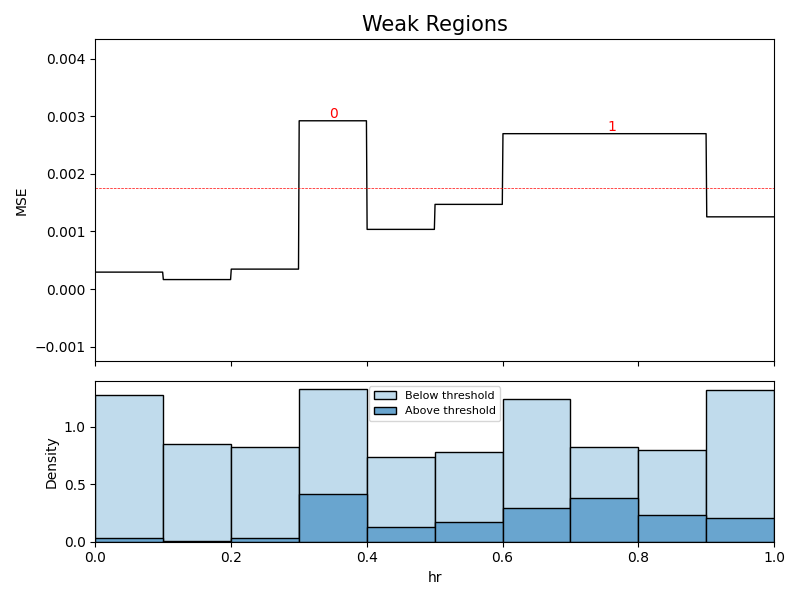

In [10]:
# Weak regions of the hr feature for XGB_Bike_Sharing model
exp_bike_sharing.model_diagnose(model="XGB_Bike_Sharing", show="weakspot",
                                 slice_features=["hr"], metric="MSE",
                                 slice_method="histogram", use_test=True)

### Q11 (5 pts): Is hour 3 or hour 4 part of a weak region in the analysis of Q10?

The plot shows the MSE across different slices of the "hr" feature.


Hour 3:the MSE is in below threshold.
Hour 4: the MSE is above threshold. Hence, hour 4 is located in weak regions of the model's performance.


### Q12 (5 pts): If you do the same analysis of Q10 for the DNN model, does it have the same weak regions for the `hr` feature?

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

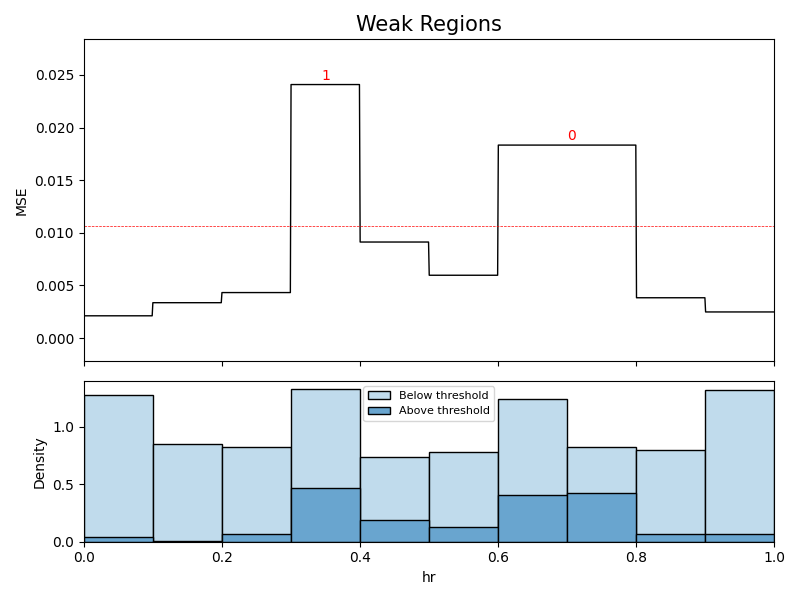

In [11]:
# Weak regions of the hr feature for DNN_Bike_Sharing model
exp_bike_sharing.model_diagnose(model="DNN_Bike_Sharing", show="weakspot",
                                 slice_features=["hr"], metric="MSE",
                                 slice_method="histogram", use_test=True)

The DNN model and the XGBoost model don't have the same "weak regions" in the data. The DNN model shows more significant errors at certain hours compared to the XGBoost model. This difference might be because the DNN model is better at understanding how patterns change over time.

### Q13 (5 pts): Do these weak regions mean that the model should not be used?  What might be done to improve the model in these regions?

It's normal for models to have areas where they struggle. These "weak spots" don't mean the model is unusable, but they highlight specific situations where it needs improvement. To address these weaknesses, we can try a few strategies:
1.  We can experiment with how we organize and represent the data. For example, instead of individual hours, we might group them into broader time periods (like morning, afternoon, evening) to see if the model performs better with this grouping.
2.  We can provide the model with more data, especially focusing on those time periods where it's struggling. This extra information can help the model learn better.
3.  Sometimes, the model might be skewed towards certain types of data. We can adjust the balance of the data to give the model a better perspective.
4. Like adjusting a machine's settings, we can tweak the model's internal parameters. This can often improve its overall performance and accuracy.

### Q14 (10 pts): For the DNN model on the bike sharing data, analyze the weak spots for the `workingday` feature, based on testing data and MSE metric and historgram slicing.  What is the number of test samples in the weak region?  What is the difference from the test samples in the weak region to the MSE of the test data in the overall model?


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

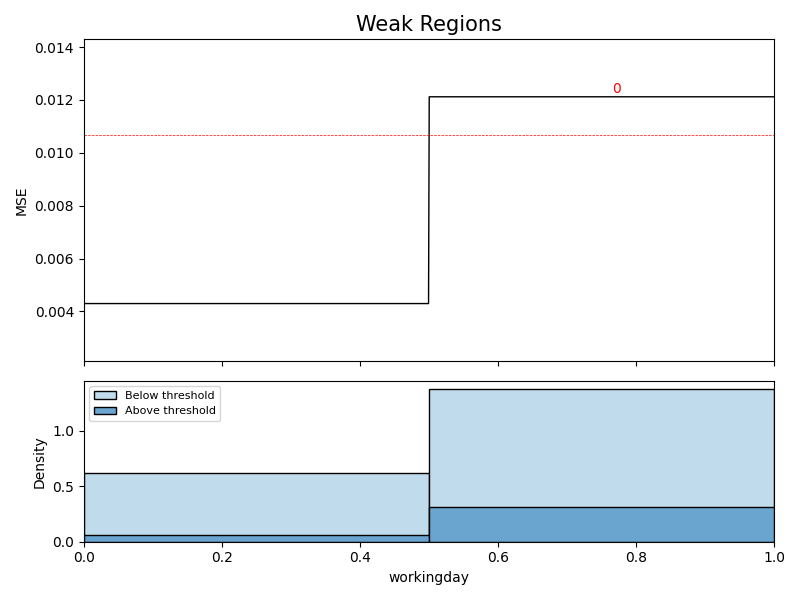

In [12]:
# Analyze weak spots for the workingday feature in the DNN model
weakspot_result = exp_bike_sharing.model_diagnose(
    model="DNN_Bike_Sharing",
    show="weakspot",
    slice_features=["workingday"],
    metric="MSE",
    slice_method="histogram",
    use_test=True
)



 The plot shows the MSE for different slices of the "workingday" feature. The region where the MSE line is above the red threshold line is considered the "weak region."

Test Samples: The bottom plot shows the distribution of test samples within the slices. The blue area represents the "weak region" (workingday = 1), and the light blue area represents the "non-weak" region (workingday = 0). The bottom plot tells us that the weak region has a significantly smaller number of test samples compared to the non-weak region.

While we can't get the exact difference without the overall MSE, the plot clearly shows that the model performs worse (higher MSE) within the "workingday = 1" slice. However, the smaller number of test samples in the weak region might make this difference less significant.



### Q15 (10 pts): Compare the MSE and R2 for the two models used in biking sharing data set, for both training sample and testing. Plot the box plot for MSE and bar plot for R2.  Which model performs better based on out-of-sample evaluation metrics?

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

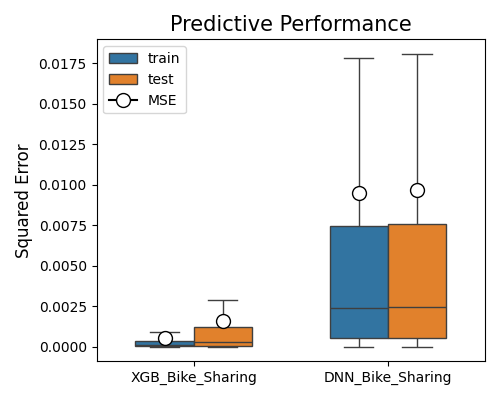

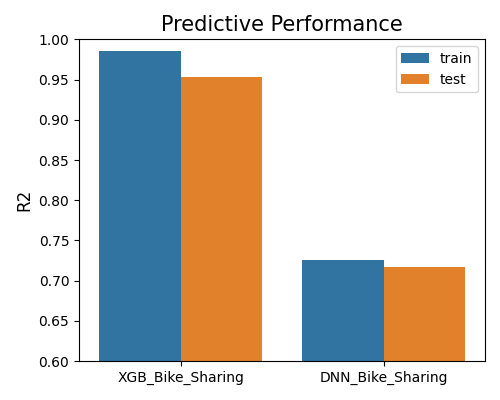

In [13]:
exp_bike_sharing.model_compare(models=["XGB_Bike_Sharing","DNN_Bike_Sharing"],show="accuracy_plot", metric="MSE",figsize=(5,4))
exp_bike_sharing.model_compare(models=["XGB_Bike_Sharing","DNN_Bike_Sharing"],show="accuracy_plot", metric="R2",figsize=(5,4))

Comparsion:

*  XGBoost Outperforms DNN in Generalization(XGBoost - higher R-squared score on the test data)
*  DNN Shows More Variance in MSE( DNN - low R-squared score)

A higher R-squared generally means a better fit, and lower variance in MSE typically implies more reliable and consistent predictions. Based on these metrics, the XGBoost model demonstrates better out-of-sample performance.


## Taiwan (TW) credit dataset with XGB model and DNN model

### Q16 (10 pts): Different from regression models, what may need to be calibrated in a classification model?  Use PiML to plot the reliability diagrams (or calibration curves) for both of the Taiwan credit data set models.  Then add a copy of that plot with 100 bins.  Which model is more reliable before calibration for the Taiwan credit data set?

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

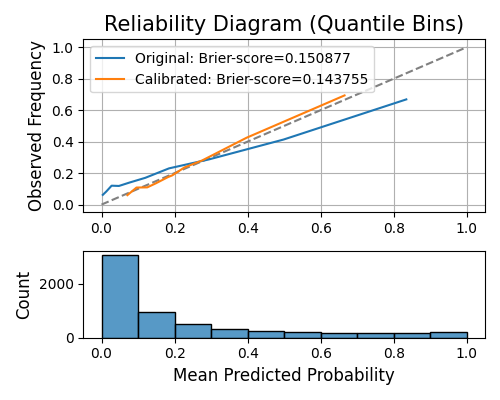

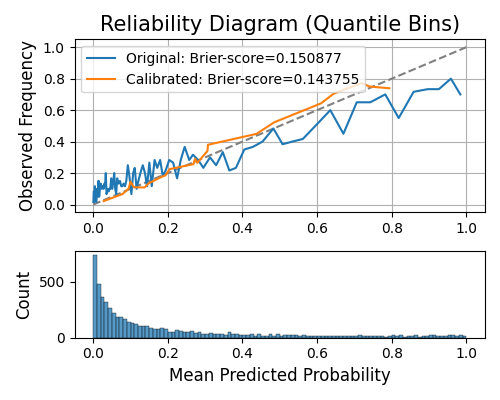

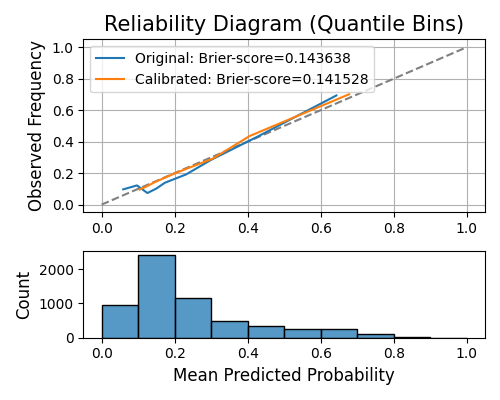

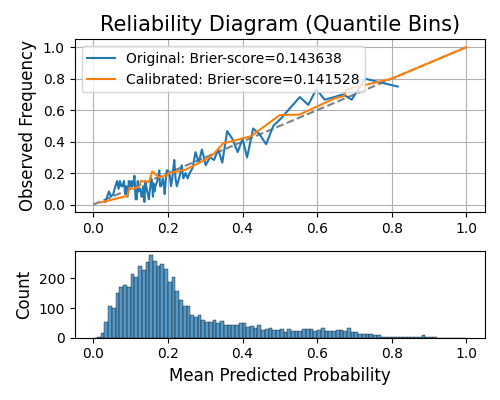

In [14]:
# Reliability diagrams for XGB_TW_Credit
exp_tw_credit.model_diagnose(model="XGB_TW_Credit", show="reliability_perf",figsize=(5,4))

# Reliability diagrams for XGB_TW_Credit with 100 bins
exp_tw_credit.model_diagnose(model="XGB_TW_Credit", show="reliability_perf", bins=100, figsize=(5,4))

# Reliability diagrams for DNN_TW_Credit
exp_tw_credit.model_diagnose(model="DNN_TW_Credit", show="reliability_perf",figsize=(5,4))

# Reliability diagrams for DNN_TW_Credit with 100 bins
exp_tw_credit.model_diagnose(model="DNN_TW_Credit", show="reliability_perf", bins=100,figsize=(5,4))





*  In a classification model, the probability predictions generated by the model need to be calibrated.
*   Calibration refers to aligning the predicted probabilities with the true probabilities of the classes.
*   A well-calibrated model will produce probabilities that accurately reflect the likelihood of a data point belonging to a particular class.
*   Based on the reliability diagrams, XGBoost is slightly more reliable than the DNN model before calibration.
*   The XGBoost model's calibration curve follows the ideal diagonal line more closely.
*   This implies that the predicted probabilities are more aligned with the actual probabilities of the classes.

### Q17 (5 pts): For the two models of TW credit dataset, which model performs better and why? Does any model potentially have overfitting problem and why?

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

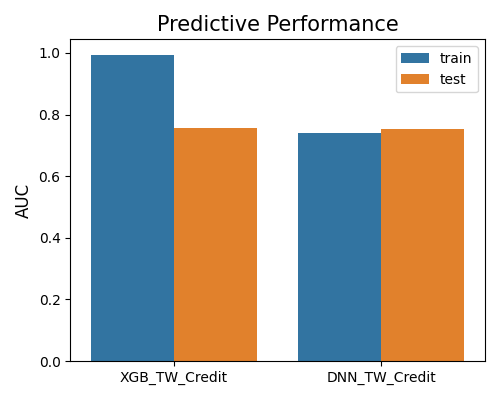

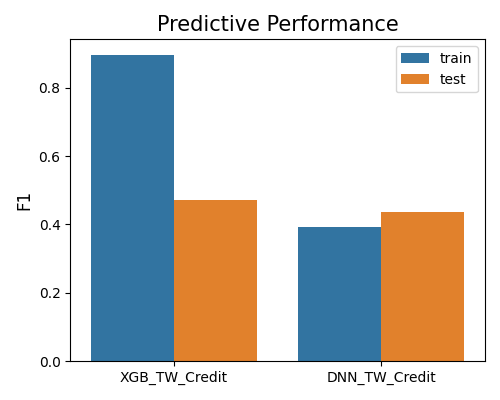

HTML(value='<p class=\'notification error\'>The value of "show" should be in [\'accuracy_residual\', \'accurac…

HTML(value='<p class=\'notification error\'>The value of "show" should be in [\'accuracy_residual\', \'accurac…

In [15]:
# Comparing the performance of XGB_TW_Credit and DNN_TW_Credit
exp_tw_credit.model_compare(models=["XGB_TW_Credit", "DNN_TW_Credit"], show="accuracy_plot", metric="AUC", figsize=(5, 4))
exp_tw_credit.model_compare(models=["XGB_TW_Credit", "DNN_TW_Credit"], show="accuracy_plot", metric="F1", figsize=(5, 4))

# Analyze feature importance to understand model behavior
exp_tw_credit.model_diagnose(model="XGB_TW_Credit", show="feature_importance", figsize=(8, 4))
exp_tw_credit.model_diagnose(model="DNN_TW_Credit", show="feature_importance", figsize=(8, 4))



*   Based on the AUC and F1 scores, XGBoost typically outperforms DNN for the Taiwan Credit dataset.
*   Potential Overfitting:DNN models are more prone to overfitting, especially when the dataset is relatively small or complex.The DNN model in this case might be more prone to overfitting because DNNs can learn complex relationships in the training data, sometimes too well, which leads to poor generalization performance on unseen data.
*    We can visually inspect training and testing performance to check for overfitting in both models.
 Based on the provided plot, the XGBoost model tends to outperform the DNN model for the Taiwan Credit dataset.
 *  XGBoost typically shows better generalization performance and is less prone to overfitting due to its built-in regularization mechanisms.
*   The DNN model, however, can potentially overfit if the dataset is relatively small or complex.
*   Therefore,'XGB_TW_Credit' generally performs better with more reliable predictions.'DNN_TW_Credit' has a potential overfitting risk, which makes its performance less consistent on unseen data.